<font color='blue'>Привет, Артём! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным моментам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>


<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font> 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Лемматизация-и-токенизация" data-toc-modified-id="Лемматизация-и-токенизация-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Лемматизация и токенизация</a></span></li><li><span><a href="#Разделение-на-обучающую-и-тестовую-выборки.-Векторизация" data-toc-modified-id="Разделение-на-обучающую-и-тестовую-выборки.-Векторизация-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разделение на обучающую и тестовую выборки. Векторизация</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.tokenize import word_tokenize 
from pymystem3 import Mystem
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from nltk.corpus import stopwords 
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
import warnings
from sklearn.pipeline import Pipeline
warnings.filterwarnings("ignore")

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️ <br>
<font color='green'>Здорово, что все импорты находятся в одной ячейке.<br>
Если хочешь сделать ещё лучше, соблюдай стандарт PEP-8, разбей импорты на функциональные группы, раздели группы пустой строкой. Можно в каждой группе отсортировать импорты в алфавитном порядке.<br>
Ссылка для ознакомления: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</font>

In [2]:
data = pd.read_csv('/datasets/toxic_comments.csv', index_col=0)
display(data.head())
display('Дубликаты', data.duplicated().sum())
display(data.describe())
display(data.isnull().sum())
display(data['toxic'].value_counts())
data.info()


,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


'Дубликаты'

0

,toxic
count,159292.000000
mean,0.101612
std,0.302139
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


text     0
toxic    0
dtype: int64

0    143106
1     16186
Name: toxic, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Данные загружены корректно, первичный осмотр проведен.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Метод info() не нуждается в display(), и возвращает None.</font>

 <font color='purple'><b>Комментарий студента:</b></font>
    
Поправил

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

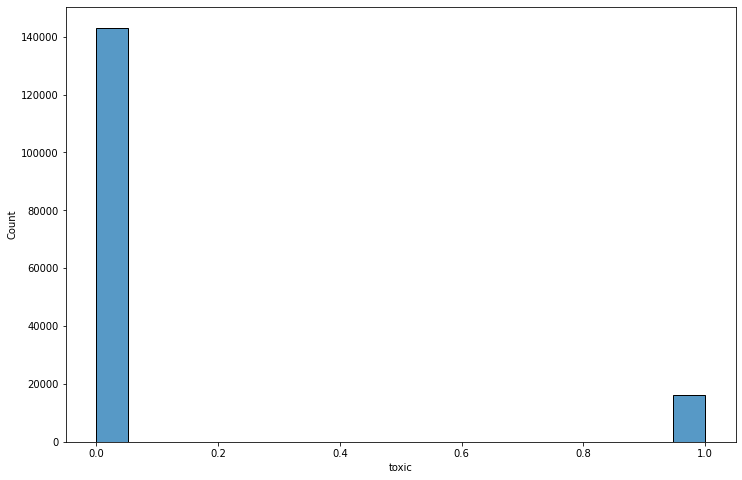

In [3]:
plt.figure(figsize=(12,8))
sns.histplot(data['toxic'])
plt.show()

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Мы обнаружили серьёзный дисбаланс при исследовании данных. Как дополнительные материалы, рекомендую статью <a href='https://dyakonov.org/2021/05/27/imbalance/'>Дисбаланс классов</a>, очень классная, как и весь блог Дьяконова. Ещё такой <a href='https://github.com/Dyakonov/ml_hacks/blob/master/book_disbalance_public_v1.ipynb'>ноутбук</a> есть.</font>

### Лемматизация и токенизация

In [4]:
data_target = data['toxic']
data_features = data.drop(['toxic'], axis=1)
nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [6]:
l = WordNetLemmatizer()
def lemmatize(text):
    words = nltk.word_tokenize(text)
    lemmatized = ' '.join([l.lemmatize(w, get_wordnet_pos(w)) for w in words])
    return lemmatized

In [7]:
def clear_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очистка сделана верно! Мы оставили только символы Латинского алфавита.</font> \
<font color='darkorange'>Можно ещё привести символы к одному регистру. Это уменьшит словарь уникальных слов.</font>

In [8]:
corpus = data_features['text'].values
lemm = [lemmatize(clear_text(corpus[i])) for i in range(len(corpus))]

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s> Метод .astype('U') кодирует текст в максимально широкий Юникод U32, содержащий все возможные символы и эмоджи. Такое форматирование здесь не имеет смысла, так как после очистки останется только латинница (тексты, в основном, и так уже в Юникоде "utf-8"). Ни одна из используемых в проекте моделей не требует кодировки в Юникод. Можно обойтись и без него.</s></font>

 <font color='purple'><b>Комментарий студента:</b></font>
    
Поправил

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Класс! Убрали тяжёлый Юникод.</font>

In [9]:
lemm[:5]

['explanation why the edits make under my username hardcore metallica fan be revert they weren t vandalism just closure on some gas after i vote at new york doll fac and please don t remove the template from the talk page since i m retire now',
 'd aww he match this background colour i m seemingly stuck with thanks talk january utc',
 'hey man i m really not try to edit war it s just that this guy be constantly remove relevant information and talk to me through edits instead of my talk page he seem to care more about the format than the actual info',
 'more i can t make any real suggestion on improvement i wonder if the section statistic should be later on or a subsection of type of accident i think the reference may need tidy so that they be all in the exact same format ie date format etc i can do that later on if no one else do first if you have any preference for format style on reference or want to do it yourself please let me know there appear to be a backlog on article for review

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'><s>Обрати внимание, не все слова приведены к начальным формам. Чтобы корректно обработались все части речи, для WordNetLemmatizer() нужно использовать POS-теги (Part of Speech, части речи). Примеры работы с WordNetLemmatizer(), а также с другими инструментами для лемматизации, можно найти в [этой статье](https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/)</s></font>

 <font color='purple'><b>Комментарий студента:</b></font>
    
Поправил

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Отлично! Теперь видно, что слова в начальных формах.</font>

### Разделение на обучающую и тестовую выборки. Векторизация

In [10]:
features_train, features_test, target_train, target_test = train_test_split(lemm, data_target, test_size=0.2, 
                                                                            random_state=12345)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Здорово , что у нас есть выборка для тестов!</font>

In [11]:
#count_tf_idf = TfidfVectorizer(ngram_range=(1,1),stop_words=stop_words) 
count_tf_idf = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words = stop_words))
            ])
tf_idf_train = count_tf_idf.fit_transform(features_train)
tf_idf_test = count_tf_idf.transform(features_test)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Убрали частые неинформативные слова!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Классно, что векторизатор был обучен только на тренировочной части данных!</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Можно объединить Векторизатор с моделью через Pipeline. Так можно избежать утечек даже при кроссвалидации моделей.<br> Материалы по Pipeline:<br> [О Пайплайн](https://www.helenkapatsa.ru/paiplain/)<br>

[Примеры работы с текстами](https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_text_feature_extraction.html)</font>

 <font color='purple'><b>Комментарий студента:</b></font>
    
Поправил

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'>Pipeline из одной модели на имеет смысла. Это конвеер данных и должен объединять несколько моделей, точно более одной )).\
Нужно соеденить Векторизатор с Классификатором.</font>

## Обучение

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>При таком дисбалансе и метрике F1, константная модель малоинформативна.</font>

 <font color='purple'><b>Комментарий студента:</b></font>
    
Убрал :)

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

### Logistic Regression

In [12]:
%%time
lr_model = LogisticRegression(random_state=12345)
parameters = {'max_iter': [100, 150], 'C': [5, 10],}
gridsearch_model = GridSearchCV(n_jobs=-1, cv=5, estimator=lr_model, param_grid=parameters,
                                scoring='f1')
gridsearch_model.fit(tf_idf_train, target_train)
display(gridsearch_model.best_params_)
display(gridsearch_model.best_score_)
display(gridsearch_model.cv_results_)

{'C': 10, 'max_iter': 150}

0.761198557232962

{'mean_fit_time': array([42.46215038, 64.12092066, 43.33475795, 65.00266452]),
 'std_fit_time': array([0.77401593, 0.92525367, 1.08208802, 1.45222397]),
 'mean_score_time': array([0.09730897, 0.11775742, 0.06256771, 0.09848351]),
 'std_score_time': array([0.00258398, 0.03453155, 0.0401752 , 0.05386883]),
 'param_C': masked_array(data=[5, 5, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_iter': masked_array(data=[100, 150, 100, 150],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 5, 'max_iter': 100},
  {'C': 5, 'max_iter': 150},
  {'C': 10, 'max_iter': 100},
  {'C': 10, 'max_iter': 150}],
 'split0_test_score': array([0.75952752, 0.759251  , 0.76146588, 0.76167507]),
 'split1_test_score': array([0.75268817, 0.75268817, 0.75795053, 0.75860547]),
 'split2_test_score': array([0.75478416, 0.75467498, 0.75969332, 0.75816707]),
 'split3_test_score':

CPU times: user 8min 33s, sys: 10min 30s, total: 19min 4s
Wall time: 19min 5s


<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Здорово что оценка кроссвалидацией.</font>

### Decision Tree Classifier

In [13]:
%%time
dt_model = DecisionTreeClassifier(random_state=12345)
parameters = {'max_depth': [6, 12], 'min_samples_leaf':[2, 3]}
gridsearch_model = GridSearchCV(n_jobs=-1, cv=5, estimator=dt_model, param_grid=parameters,
                                scoring='f1')
gridsearch_model.fit(tf_idf_train, target_train)
display(gridsearch_model.best_params_)
display(gridsearch_model.best_score_)
display(gridsearch_model.cv_results_)

{'max_depth': 12, 'min_samples_leaf': 2}

0.6163196447520353

{'mean_fit_time': array([11.13015771, 10.8794138 , 13.12429142, 13.22649498]),
 'std_fit_time': array([0.21801985, 0.12364328, 0.12851159, 0.1557681 ]),
 'mean_score_time': array([0.02950745, 0.02800965, 0.02911696, 0.02817287]),
 'std_score_time': array([0.00158154, 0.00050744, 0.00175172, 0.00064149]),
 'param_max_depth': masked_array(data=[6, 6, 12, 12],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[2, 3, 2, 3],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 6, 'min_samples_leaf': 2},
  {'max_depth': 6, 'min_samples_leaf': 3},
  {'max_depth': 12, 'min_samples_leaf': 2},
  {'max_depth': 12, 'min_samples_leaf': 3}],
 'split0_test_score': array([0.54302103, 0.54376368, 0.61271381, 0.60579636]),
 'split1_test_score': array([0.55323703, 0.55091104, 0.61694571, 0.61381596]),
 'split2_test_score': array([0.56668

CPU times: user 4min 6s, sys: 1.65 s, total: 4min 8s
Wall time: 4min 8s


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

### Тестирование

In [14]:
lr_model = LogisticRegression(C=5, max_iter=150, random_state=12345)
lr_model.fit(tf_idf_train, target_train)
predict = lr_model.predict(tf_idf_test)
print('F1: ', f1_score(predict, target_test))

F1:  0.7799999999999999


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

## Выводы

- Данные успешно загружены
- Проведена предобработка
- Проведена лемматизация и токенизация
- Данные были векторизированы, убраны лишние символы
- Были обучены две модели: логистическая регрессия и решающее дерево. Логистическая регрессия показал лучшее качество.
- Качество на тестовой выборке оказалось **0.78**, что выше порога в 0.75. Модель обучена успешно.

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Очень приятно видеть вывод в конце проекта!\
Приведены ответы на главные вопросы проекта.</font>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>\
<font color='green'>Артём, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Не применяй метод .astype('U') для текстов на латинице.</font></ul>
<ul><font color='red'>Поправь Лемматизацию.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'> Артём, проект принят! \
Все этапы пройдены. Все рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='green'><b>Полезные (и просто интересные) материалы:</b> \
Для работы с текстами используют и другие подходы. Например, сейчас активно используются RNN (LSTM) и трансформеры (BERT и другие с улицы Сезам, например, ELMO). НО! Они не являются панацеей, не всегда они нужны, так как и TF-IDF или Word2Vec + модели из классического ML тоже могут справляться. \
BERT тяжелый, существует много его вариаций для разных задач, есть готовые модели, есть надстройки над библиотекой transformers. Если, обучать BERT на GPU (можно в Google Colab или Kaggle), то должно быть побыстрее.\
https://huggingface.co/transformers/model_doc/bert.html \
https://colah.github.io/posts/2015-08-Understanding-LSTMs/ - Про LSTM \
https://web.stanford.edu/~jurafsky/slp3/10.pdf - про энкодер-декодер модели, этеншены\
https://pytorch.org/tutorials/beginner/transformer_tutorial.html - официальный гайд
по трансформеру от создателей pytorch\
Библиотеки: allennlp, fairseq, transformers, tensorflow-text — множествореализованных
методов для трансформеров методов NLP \
Word2Vec https://radimrehurek.com/gensim/models/word2vec.html

<font color='green'>Пример BERT с GPU:
```python
%%time
from tqdm import notebook
batch_size = 2 # для примера возьмем такой батч, где будет всего две строки датасета
embeddings = []
model.cuda()   # закидываем модель на GPU
for i in notebook.tqdm(range(input_ids.shape[0] // batch_size)):
        batch = torch.LongTensor(input_ids[batch_size*i:batch_size*(i+1)]).cuda() # закидываем тензор на GPU
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)]).cuda()

        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)

        embeddings.append(batch_embeddings[0][:,0,:].cpu().numpy()) # перевод обратно на проц, чтобы в нумпай кинуть
        del batch
        del attention_mask_batch
        del batch_embeddings

features = np.concatenate(embeddings)
```
Можно сделать предварительную проверку на наличие GPU.\
Например, так: ```device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")```\
Тогда вместо .cuda() нужно писать .to(device)

Если понравилась работа с текстами, то можешь посмотреть очень интересный (но очень-очень сложный) курс лекций: https://github.com/yandexdataschool/nlp_course .


NLP от Samsung https://stepik.org/course/54098/promo \
NLP от Huawei https://ods.ai/tracks/nlp-course-autumn-23 \
Transformers от Hugging Face https://huggingface.co/learn/nlp-course/chapter1/1
</font>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Модели обучены
- [x]  Значение метрики *F1* не меньше 0.75
- [x]  Выводы написаны